# Q2-4.PWM出力の制御

## 問題
**Q2-4.テストヘッドのpwmout0のLEDを0-250まで10刻みで明るくしていく処理を書きましょう。**  
明るさを変化させるごとに0.5秒停止する処理をいれてください。  
250になったら明るさを0にしてから終了してください。

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# M5との通信の際はakari_clientのライブラリをインポートする
from akari_client import AkariClient
# sleep関数を使うためにtimeのライブラリをインポートする。
import time

# AkariClient、m5stackのインスタンスを取得する
akari = AkariClient()
m5 = akari.m5stack

### ここから問題  ###
"""(処理を書く)"""
### ここまで  ###

### 動作イメージ

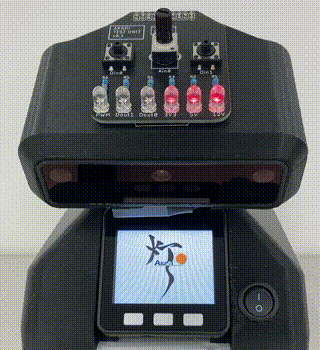

In [1]:
from IPython.display import Image
Image('image/q2-4.gif')

### ヒント

**M5のPWM出力を制御するには、 _set_pwmout()_ を使います。**
```python
akari_client.m5stack_client.set_pwmout(self, pin_id: int, value: int, sync: bool = True) -> None:
"""ヘッド部GPIOピンのPWM出力を設定する。

Args:
    pin_id: pin番号。デフォルトではpwmout0しかないため、0を指定すること。
    value: PWM出力の値。 0-255で指定し、0で0V、255で3.3Vを出力する。
    sync: 同期実行の指定。``True``の場合M5側で実行完了するまで関数の終了待ちを行う。
"""
```

下記のセルを実行すると使い方の例が見られます。

In [ ]:
# M5との通信の際はakari_clientのライブラリをインポートする
from akari_client import AkariClient

# AkariClient、m5stackのインスタンスを取得する
akari = AkariClient()
m5 = akari.m5stack

# pwmout0を255に
m5.set_pwmout(pin_id=0, value=255)

**処理を反復するには、 _for_ を使います。**

for文は、条件の範囲内で処理を反復する方法です。  
for文の使い方はいくつかあるので、下記を参照してみてください。  
https://www.python.jp/train/list/list_forloop.html

今回は`for i in range(start, end, step):`を使いましょう。  
この場合変数 i が start から始まり end に達するまで、 step ずつ増加します。

下記のセルを実行すると使い方の例が見れます。

In [ ]:
#1,3,5,7が出力されるfor文
for i in range(1, 9, 2):
  print(i)

上のセルを参考に、iを0〜250まで10ずつ増加させ、それをset_dout()の _value=_ に与えましょう。

明るさを変化させるごとに0.5秒スリープする、ループから抜けたら明るさを0にする、という処理を入れるように指定されています。  
それらを入れるタイミングにも気を付けましょう。

完成したら実行してみましょう。  
テストヘッドのpwmout0のLEDが0.5秒ごとにだんだん明るくなったら成功です。

## 回答と解説
以下は回答例と解説です。動作が正しければ、これと同じでなくても問題ありません。

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# M5との通信の際はakari_clientのライブラリをインポートする
from akari_client import AkariClient
# sleep関数を使うためにtimeのライブラリをインポートする
import time

# AkariClient、m5stackのインスタンスを取得する
akari = AkariClient()
m5 = akari.m5stack

### ここから問題  ###
# iを0から250まで10ずつ増加させる
for i in range(0, 250, 10):
    # pwmout0の出力をiにする
    m5.set_pwmout(pin_id=0, value=i)
    time.sleep(0.5)
# ループ処理が終了したらpwmout0の出力を0にする
m5.set_pwmout(pin_id=0, value=0)
### ここまで  ###

#### 15行目:
```python
for i in range(0, 250, 10):
```
for文を使って変数 i を変化させていきます。 i はpwmout0の明るさとして与えるので、0から250まで10ずつ変化させます。

#### 17行目:
```python
m5.set_pwmout(pin_id=0, value=i)
```
これまでの問題と同様、11行目で _m5_ という名前でAkariClient().m5stackのインスタンスを作成しているので、m5.set_pwmout()という形で書きます。

pin_idは0、valueはfor文で変化させる _i_ を使います。  
i が10ずつ増加するので、この値を引数にします。

#### 18行目:
```python
time.sleep(0.5)
```
0.5秒間停止させるように問題文で指示されているので、time.sleep()を使って0.5秒停止します。

#### 20行目:
```python
m5.set_pwmout(pin_id=0, value=0)
```
ループが完了したあとに出力を0にするよう指示されているので、for文の外にset_pwmout()を書きます。

pwmout0を0にするため、 _pin_id=0_ 、 _value=0_ です。

## Tips

#### dout0, dout1との同時制御

_set_allout()_ を使うことで、3ピン同時に制御することもできます。
```python
akari_client.m5stack_client.set_allout(
        self,
        *,
        dout0: bool,
        dout1: bool,
        pwmout0: int,
        sync: bool = True,
    ) -> None:
"""ヘッド部GPIOピンの出力をまとめて設定する。

Args:
    dout0: dout0の出力値。``False``で0V,``True``で3.3V出力。
    dout1: dout1の出力値。``False``で0V,``True``で3.3V出力。
    pwmout0: pwmout0の出力値。0-255で指定し、0で0V、255で3.3Vを出力する。
    sync: 同期実行の指定。``True``の場合M5側で実行完了するまで関数の終了待ちを行う。

"""
```

下記のセルを実行するとdout0をLo,dout1をHi,pwmout0を200にすることができます。

In [ ]:
# pwmout0を255に
m5.set_allout(dout0=False, dout1=True, pwmout0=200)

## 最後に
これでQ2-4は終了です。次は、温度データを取得してみましょう。

[次の問題へ](q2-5_temperature.ipynb)